In [6]:
import tensorflow as tf 
import matplotlib as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as pyplot

#Get IDs from tsv
def get_IDs(f_path):
  FULL_ID = []
  # open .tsv file
  with open(f_path) as f: 
    # Read data line by line
    for line in f:     
      l=line.split('\t')
      # append list to ans
      FULL_ID.append(l)
  CLASS_ID=[]
  IMAGE_ID=[]
  for i in range(len(FULL_ID)):
      CLASS_ID.append(FULL_ID[i][0][:9])
      IMAGE_ID.append(FULL_ID[i][0])
  return CLASS_ID, IMAGE_ID

#Converts Image Data to arrays
def get_image_data(d_path, I_IDs):
    DATA=[]
    for IDs in range(len(I_IDs)):
        image = mpimg.imread(f'{d_path}{I_IDs[IDs]}.JPEG')
        if image.shape[-1] != 3:
          image = tf.concat([tf.expand_dims(image,-1), tf.expand_dims(image,-1), tf.expand_dims(image,-1)], axis=-1)
        image = tf.image.resize(image, (64,64))
        image = tf.math.round(image)
        image = tf.cast(image,tf.uint8)
        image = tf.expand_dims(image,0)
        DATA.append(image)
    DATA=tf.concat(DATA, axis = 0)
    #print(DATA.shape)
    return DATA






(1200, 64, 64, 3)
(50, 64, 64, 3)
(64, 64, 3)


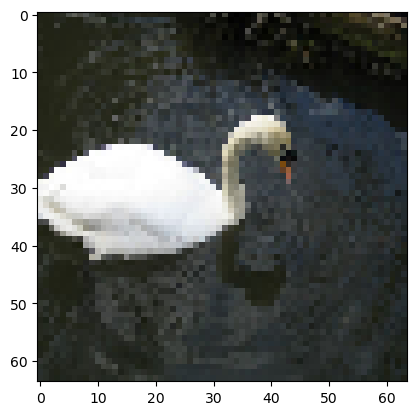

In [7]:
#Get Train and Test Images

#Train Images
tsv_p_train= "DATA/stimulus_perceptionNaturalImageTraining.tsv"
Path_to_train="DATA/Images_InTrainSet/"
Train_CLASS_ID, Train_IMAGE_ID = get_IDs(tsv_p_train)    
Train_images= get_image_data(Path_to_train, Train_IMAGE_ID)
print(Train_images.shape)



#Test Images
tsv_p_test= "DATA/stimulus_perceptionNaturalImageTest.tsv"
Path_to_test= "DATA/Images_InTestSet/"
Test_CLASS_ID, Test_IMAGE_ID = get_IDs(tsv_p_test)    
Test_images= get_image_data(Path_to_test, Test_IMAGE_ID)
print(Test_images.shape)

print(Test_images[2].shape)

pyplot.imshow(tf.squeeze(Test_images[4]))
pyplot.show()




We could do an image showing section right here